In [ ]:
!unzip dataset.zip -d data

Archive:  dataset.zip
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (1).webp  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (104).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (106).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (115).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (119).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (124).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (135).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (139).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (144).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (147).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- c

In [ ]:
import os
import os.path as op
import shutil
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
dataset_folder = "data/skin-disease-datasaet"

In [ ]:
image_path = []

In [ ]:
for filename in os.listdir(dataset_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        current_image_path = op.join(dataset_folder, filename)
        image_path.append(current_image_path)
        print(current_image_path)
labels = [op.basename(op.dirname(path)) for path in image_path]
train_df = pd.DataFrame({'image_path': image_path, 'label': labels})

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
fields = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os.path as op

In [ ]:
def print_and_get_images(folder_path):
  image_paths = []  # List to store image paths
  for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            # Construct full image path
            current_image_path = op.join(folder_path, filename)

            # Print image path
            print(current_image_path)

            # Add image path to the list
            image_paths.append(current_image_path)

            # Read and display image using OpenCV and Matplotlib
            image = cv2.imread(current_image_path)

            # Convert color space from BGR (OpenCV default) to RGB (Matplotlib default)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            plt.imshow(image_rgb)
            plt.title(filename)  # Set title to filename
            plt.axis('off')  # Hide axes
            plt.show()

  return image_paths  # Return list of image paths

In [ ]:
dataset_folder = "data/skin-disease-datasaet"  # Replace with your folder path
image_paths = print_and_get_images(dataset_folder)

In [ ]:
parent_label("data/test/000621fb3cbb32d8935728e48679680e.jpg")

'test'

In [ ]:
from fastai.vision.all import *

In [ ]:
dataset_folder = "data/skin-disease-datasaet/test_set"

In [ ]:
dls = ImageDataLoaders.from_path_func(
    dataset_folder,
    get_image_files(dataset_folder),
    valid_pct=0.2,
    seed=42,
    label_func=parent_label,
    item_tfms=Resize(224)
)

In [ ]:
dls.vocab

['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus', 'FU-ringworm', 'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles']

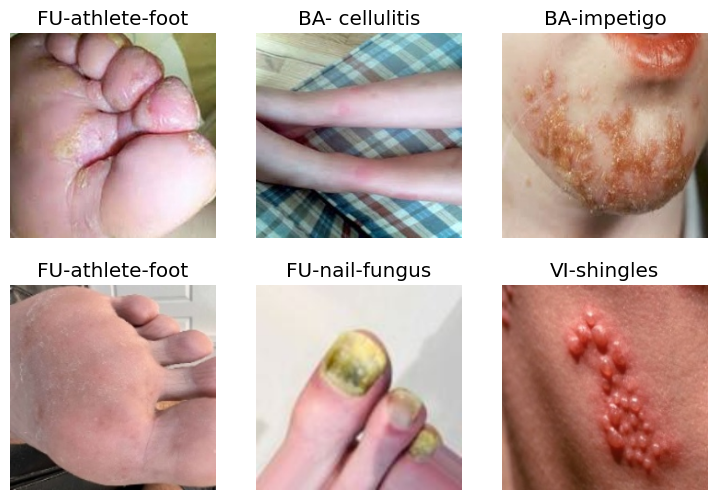

In [ ]:
dls.train.show_batch(max_n=6, nrows=2)

In [ ]:
learner = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 61.4MB/s]


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0008317637839354575)

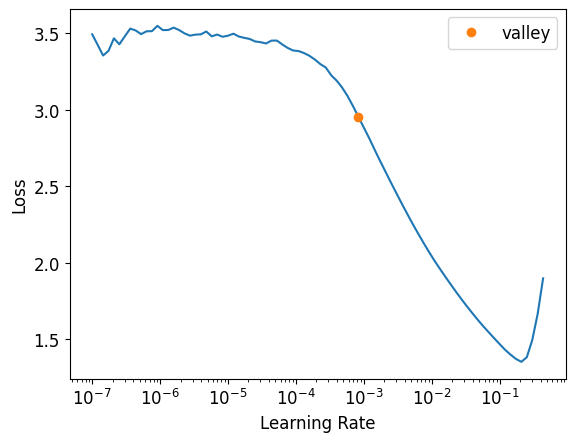

In [ ]:
learner.lr_find()

In [ ]:
learner.fine_tune(epochs=6, freeze_epochs=1, base_lr=0.0012)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.255032,4.546982,0.847826,0.152174,01:00


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.003364,3.516817,0.891304,0.108696,01:20
1,2.580068,2.654715,0.826087,0.173913,01:20
2,2.138475,1.898146,0.673913,0.326087,01:20
3,1.784737,1.437584,0.456522,0.543478,01:20
4,1.497598,1.238444,0.369565,0.630435,01:25
5,1.299274,1.165218,0.369565,0.630435,01:21


In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
interp.print_classification_report()

                            precision    recall  f1-score   support

            BA- cellulitis       0.50      0.60      0.55         5
               BA-impetigo       0.50      0.50      0.50         4
           FU-athlete-foot       0.62      1.00      0.77         5
            FU-nail-fungus       0.50      1.00      0.67         3
               FU-ringworm       0.40      0.33      0.36         6
PA-cutaneous-larva-migrans       0.00      0.00      0.00         5
             VI-chickenpox       1.00      0.89      0.94         9
               VI-shingles       0.86      0.67      0.75         9

                  accuracy                           0.63        46
                 macro avg       0.55      0.62      0.57        46
              weighted avg       0.61      0.63      0.61        46



In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

NameError: name 'ClassificationInterpretation' is not defined

In [ ]:
learner.export("Skin_disease.pkl")

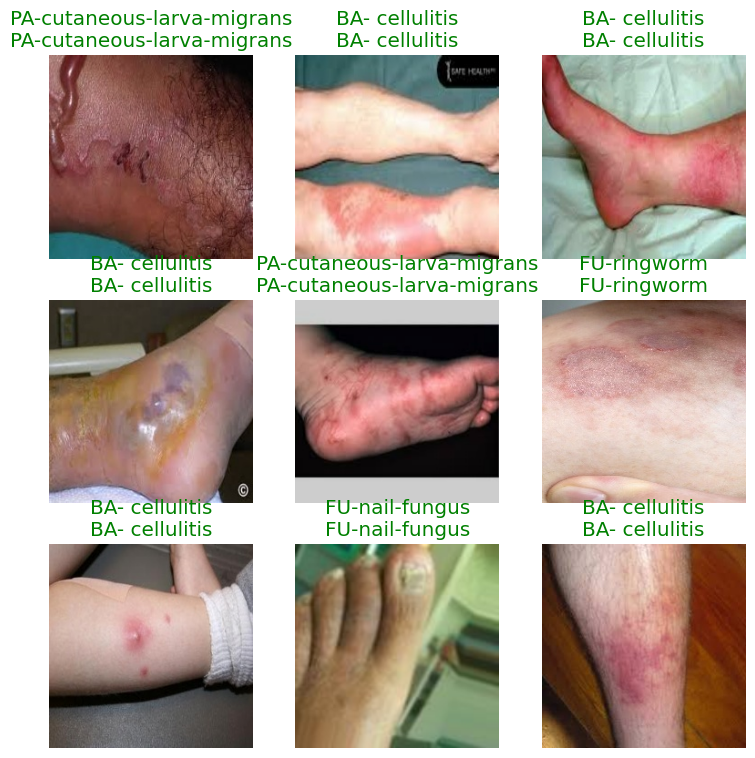

In [ ]:
learner.show_results(shuffle=True)

In [ ]:
from fastbook import *
from glob import glob
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score

learn_inf = load_learner('Skin_disease.pkl')

In [ ]:
learn_inf.predict("1718683096_shingles.jpg")

('FU-athlete-foot',
 tensor(2),
 tensor([0.0209, 0.0150, 0.7588, 0.0123, 0.0975, 0.0232, 0.0443, 0.0282]))

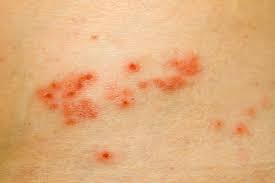

In [ ]:
from PIL import Image
im = Image.open("1718683096_shingles.jpg")
im

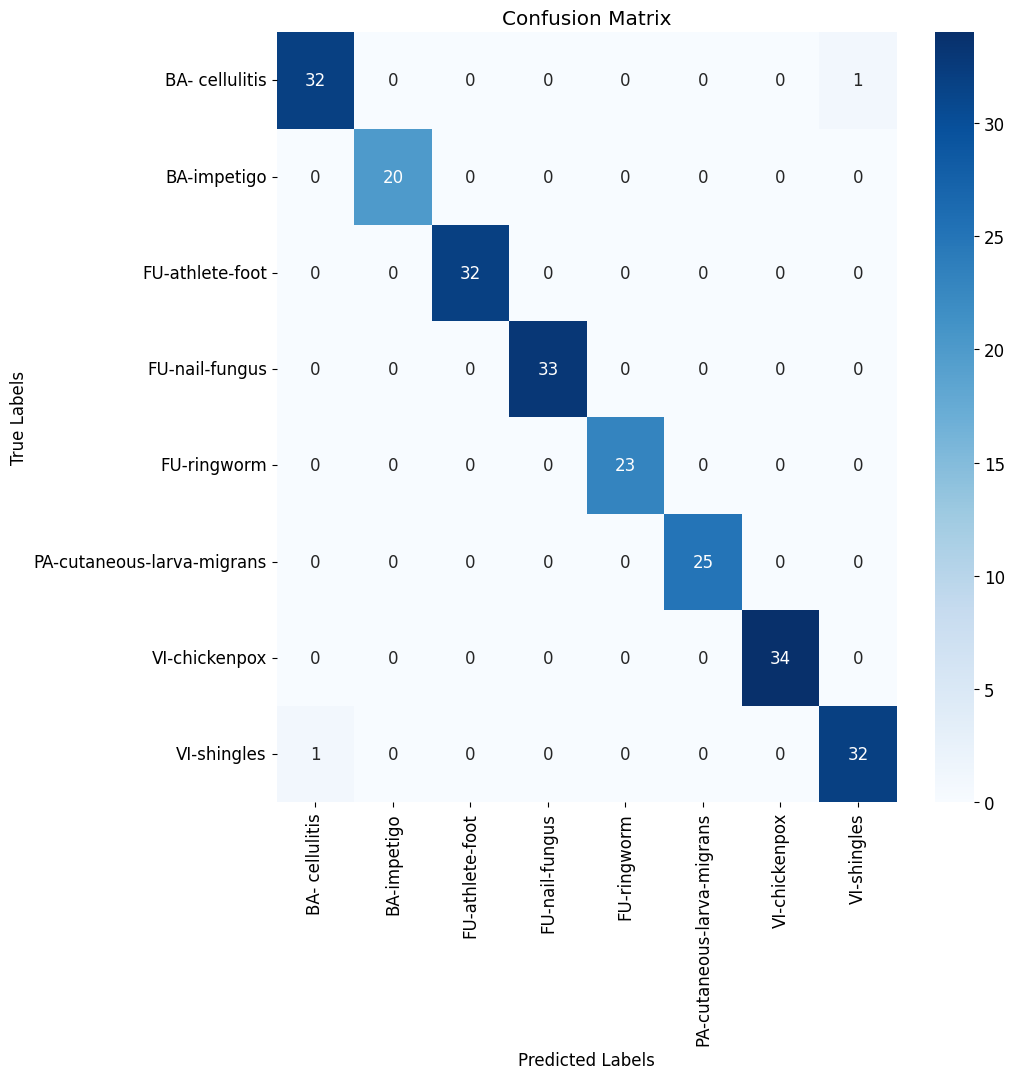

In [ ]:
from fastai.vision.all import *
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_path = '/content/data/skin-disease-datasaet/test_set'

def parent_label(image_file):
  return os.path.basename(os.path.dirname(image_file))

image_files = get_image_files(test_path)
true_labels = [parent_label(image_file) for image_file in image_files]
learn_inf = load_learner('Skin_disease.pkl')
predictions = [learn_inf.predict(image_file) for image_file in image_files]
predicted_labels = [pred[0] for pred in predictions]
cm = confusion_matrix(true_labels, predicted_labels)
class_labels = sorted(list(set(true_labels)))
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(predicted_labels, true_labels))


                            precision    recall  f1-score   support

            BA- cellulitis       0.97      0.97      0.97        33
               BA-impetigo       1.00      1.00      1.00        20
           FU-athlete-foot       1.00      1.00      1.00        32
            FU-nail-fungus       1.00      1.00      1.00        33
               FU-ringworm       1.00      1.00      1.00        23
PA-cutaneous-larva-migrans       1.00      1.00      1.00        25
             VI-chickenpox       1.00      1.00      1.00        34
               VI-shingles       0.97      0.97      0.97        33

                  accuracy                           0.99       233
                 macro avg       0.99      0.99      0.99       233
              weighted avg       0.99      0.99      0.99       233



Deployment

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.3 MB/s eta 0:00:00


In [ ]:
import streamlit as st
from PIL import Image

# Set the title of the app
st.title("Image Upload and Display App")

# Create a file uploader widget
uploaded_file = st.file_uploader("Choose an image file", type=["jpg", "jpeg", "png"])

# Check if a file is uploaded
if uploaded_file is not None:
    # Open the uploaded image file
    image = Image.open(uploaded_file)

    # Display the image
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Display the image properties
    st.write(f"Image format: {image.format}")
    st.write(f"Image size: {image.size}")
    st.write(f"Image mode: {image.mode}")

else:
    st.write("Please upload an image file to see the preview.")

2024-11-17 14:07:53.114 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 14:07:53.499 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-11-17 14:07:53.510 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 14:07:53.512 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 14:07:53.518 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 14:07:53.520 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 14:07:53.544 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 14:07:53.550 Thread 'MainThread': mi

base line

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from fastai.vision.all import *
from sklearn.metrics import confusion_matrix

In [ ]:
set_seed(99, True)

In [ ]:
data = {'Path': [], 'Class': []}

dataset_path = '/content/data/skin-disease-datasaet/train_set'

entries = os.listdir(dataset_path)

for entry in entries:
    full_path = os.path.join(dataset_path, entry)
    if os.path.isdir(full_path):
        files = os.listdir(full_path)
        for file in files:
            file_path = os.path.join(full_path, file)

            data['Path'].append(os.path.join(entry, file))
            data['Class'].append(entry)

df = pd.DataFrame(data)

In [ ]:
df['Class'].value_counts()

,count
Class,
VI-chickenpox,136
BA- cellulitis,136
VI-shingles,130
FU-nail-fungus,129
FU-athlete-foot,124
PA-cutaneous-larva-migrans,100
FU-ringworm,90
BA-impetigo,80


In [ ]:
df.Class = df.Class.str.replace('VI-chickenpox', 'chickenpox')
df.Class = df.Class.str.replace('BA- cellulitis', 'cellulitis')
df.Class = df.Class.str.replace('VI-shingles', 'shingles')
df.Class = df.Class.str.replace('FU-nail-fungus', 'nail fungus')
df.Class = df.Class.str.replace('FU-athlete-foot', 'athlete foot')
df.Class = df.Class.str.replace('PA-cutaneous-larva-migrans', 'cutaneous larva migrans')
df.Class = df.Class.str.replace('FU-ringworm', 'ring worm')
df.Class = df.Class.str.replace('BA-impetigo', 'impetigo')
df = df.sort_values(by='Class')

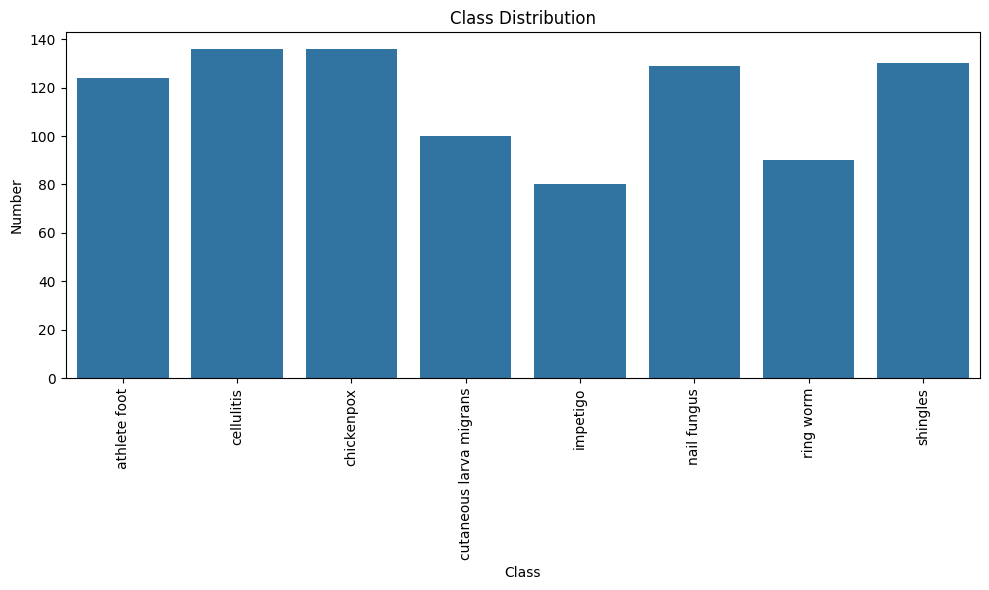

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Class')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('/content/data/skin-disease-datasaet')
plt.show()

Random

In [ ]:
import random
classes = ['A','B','C']
random_prediction = random.choice(classes)
print(f"Random Prediction: {random_prediction}")

Random Prediction: B


In [ ]:
import random

#สมมติว่ามี 3 คลาส
classes = ['A', 'B', 'C']

#สุ่มคลาส
random_prediction = random.choice(classes)
print(f"Random Prediction: {random_prediction}")

Random Prediction: A


In [ ]:
import random
from sklearn.metrics import accuracy_score, f1_score

#สมมติว่ามี 3 คลาส
classes = ['A', 'B', 'C']

#สร้าง Ground Truth (ค่าจริง)
ground_truth = random.choice(classes)  # เช่น 'A'
print(f"Ground Truth: {ground_truth}")

#สุ่มคลาส (Random Prediction)
random_prediction = random.choice(classes)
print(f"Random Prediction: {random_prediction}")

#แปลงค่าจริงและค่าทำนายให้อยู่ในรูปแบบของ List (เพื่อใช้กับ sklearn)
y_true = [ground_truth]
y_pred = [random_prediction]

#คำนวณ Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#คำนวณ F1 Score (average='macro' ไม่จำเป็นเพราะเป็น single prediction)
f1 = f1_score(y_true, y_pred, labels=classes, average='macro', zero_division=1)
print(f"F1 Score: {f1:.2f}")

Ground Truth: C
Random Prediction: A
Accuracy: 0.00
F1 Score: 0.33
